In [2]:
import mplhep as hep
import matplotlib.pyplot as plt
from wremnants.datasets.datagroups import datagroups2016
from utilities import boostHistHelpers as hh,input_tools
from wremnants import plot_tools,syst_tools,theory_tools
from wremnants import histselections as sel
import lz4.frame
import pickle
import numpy as np
import hist
import uproot

In [3]:
%load_ext autoreload
%autoreload 2

Here
55071326.27459677 55071326.27459677
Here
55567360.33248611 55071326.27459677
Here
54575292.2167074 55071326.27459677


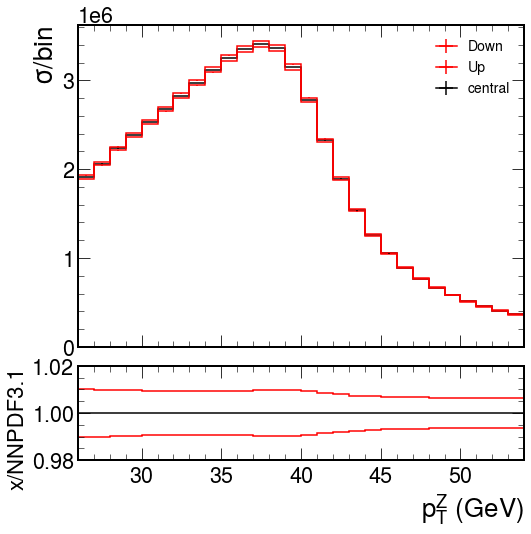

In [175]:
fig = plot_tools.makePlotWithRatioToRef(hists, colors=["black", "red", "red"], labels=["central", "Up", "Down"], rrange=[0.98, 1.02], ylabel="$\sigma$/bin", xlabel="p$_{T}^{\mathrm{Z}}$ (GeV)", rlabel="x/NNPDF3.1", binwnorm=1.0, nlegcols=1)


In [101]:
hct18 = histInfo["Wmunu"]["pdfCT18"]
hct18Up, hct18Down = theory_tools.hessianPdfUnc(hct18, "tensor_axis_0", False, scale=1/1.67)

In [103]:
hmmht = histInfo["Wmunu"]["pdfMMHT"]
hmmhtUp, hmmhtDown = theory_tools.hessianPdfUnc(hmmht, "tensor_axis_0", False)

In [99]:
hists = [x.project("ptVgen") for x in [hnnpdf[...,0], hnnpdfUp, hnnpdfDown, hct18[...,0], hct18Up, hct18Down, hmmht[...,0], hmmhtUp, hmmhtDown]]
names = ["NNPDF31", "NNPDF31 $\pm1\sigma$", "", "CT18", "CT18 $\pm1\sigma$", "", "MMHT", "MMHT $\pm1\sigma$", ""]
colors = ["black", "gray", "gray", "blue", "lightblue", "lightblue", "green", "lightgreen", "lightgreen"]

In [161]:
hnnpdf40 = newhists["pdfNNPDF40"]
hnnpdf40Cen = hnnpdf40[...,0]
hnnpdf31Cen = hnnpdf[...,0]
hnnpdf40Up, hnnpdf40Down = theory_tools.hessianPdfUnc(hnnpdf40, "tensor_axis_0", True)

In [164]:
hnnpdf4lhc = newhists["pdfPDF4LHC21"]
hnnpdf4lhcCen = hnnpdf4lhc[...,0]
hnnpdf4lhcUp, hnnpdf4lhcDown = theory_tools.hessianPdfUnc(hnnpdf4lhc, "tensor_axis_0", True)

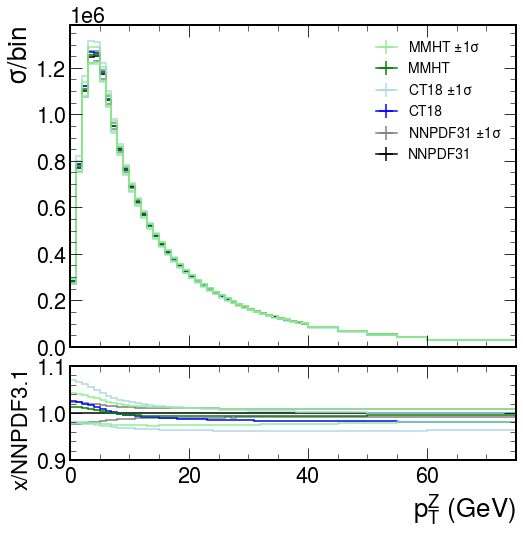

In [100]:
fig = plot_tools.makePlotWithRatioToRef(hists, colors=colors, labels=names, rrange=[0.9, 1.1], ylabel="$\sigma$/bin", xlabel="p$_{T}^{\mathrm{Z}}$ (GeV)", rlabel="x/NNPDF3.1", binwnorm=1.0, nlegcols=1)

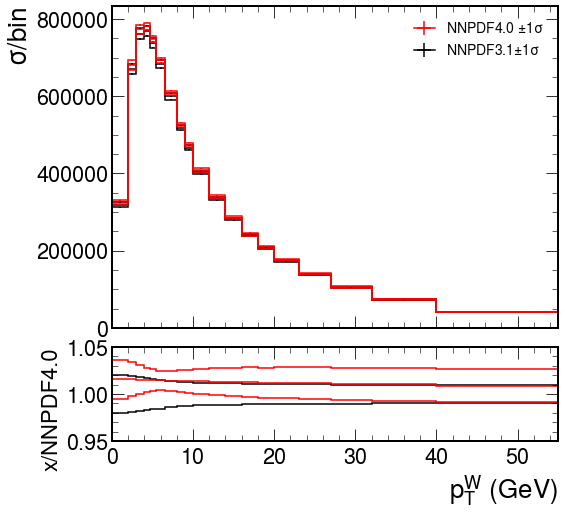

In [150]:
hists = [x.project("ptVgen") for x in [hnnpdf31Cen, hnnpdfUp, hnnpdfDown, hnnpdf40Cen, hnnpdf40Up, hnnpdf40Down, ]]
names = ["NNPDF3.1$\pm1\sigma$", "", "", "NNPDF4.0 $\pm1\sigma$", "", "", ]
colors = ["black", "black", "black", "red", "red", "red"]
fig = plot_tools.makePlotWithRatioToRef(hists, colors=colors, labels=names, rrange=[0.95, 1.05], ylabel="$\sigma$/bin", xlabel="p$_{T}^{\mathrm{W}}$ (GeV)", rlabel="x/NNPDF4.0", binwnorm=1.0, nlegcols=1)

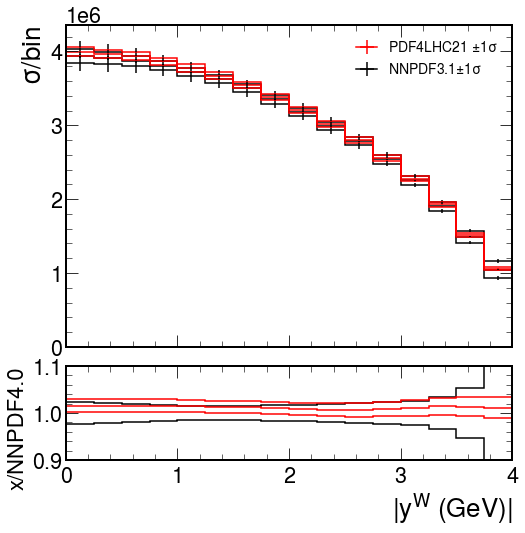

In [165]:
yhists = [x.project("absYVgen") for x in [hnnpdf31Cen, hnnpdfUp, hnnpdfDown, hnnpdf40Cen, hnnpdf40Up, hnnpdf40Down, ]]
fig = plot_tools.makePlotWithRatioToRef(yhists, colors=colors, labels=names, rrange=[0.9, 1.1], ylabel="$\sigma$/bin", xlabel="$|\mathrm{y}^{\mathrm{W}}$ (GeV)|", rlabel="x/NNPDF4.0", binwnorm=1.0, nlegcols=1)


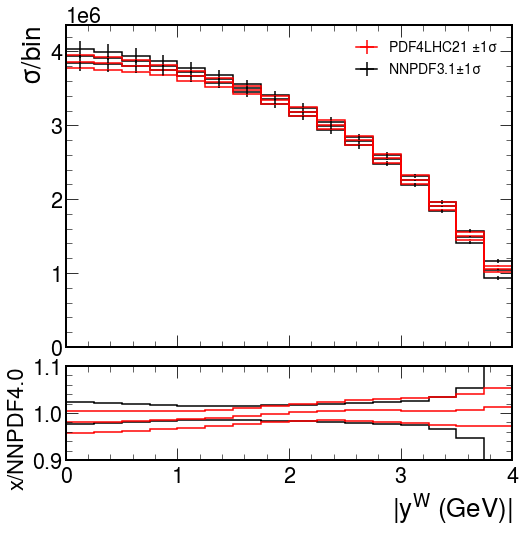

In [166]:
names = ["NNPDF3.1$\pm1\sigma$", "", "", "PDF4LHC21 $\pm1\sigma$", "", "", ]
colors = ["black", "black", "black", "red", "red", "red"]
yhists = [x.project("absYVgen") for x in [hnnpdf31Cen, hnnpdfUp, hnnpdfDown, hnnpdf4lhcCen, hnnpdf4lhcUp, hnnpdf4lhcDown, ]]
fig = plot_tools.makePlotWithRatioToRef(yhists, colors=colors, labels=names, rrange=[0.9, 1.1], ylabel="$\sigma$/bin", xlabel="$|\mathrm{y}^{\mathrm{W}}$ (GeV)|", rlabel="x/NNPDF4.0", binwnorm=1.0, nlegcols=1)

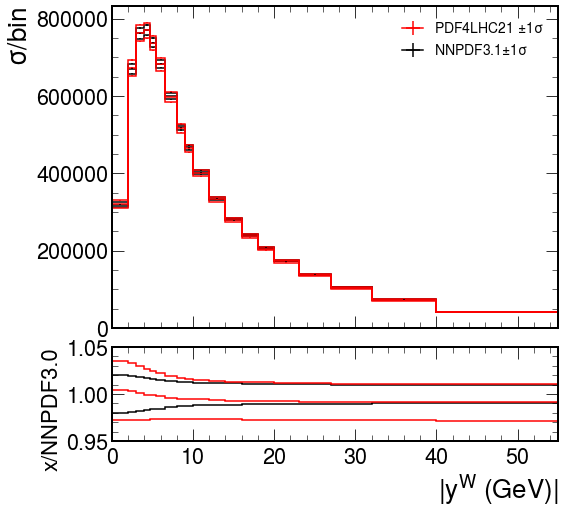

In [156]:
yhists = [x.project("ptVgen") for x in [hnnpdf31Cen, hnnpdfUp, hnnpdfDown, hnnpdf4lhcCen, hnnpdf4lhcUp, hnnpdf4lhcDown, ]]
fig = plot_tools.makePlotWithRatioToRef(yhists, colors=colors, labels=names, rrange=[0.95, 1.05], ylabel="$\sigma$/bin", xlabel="$|\mathrm{y}^{\mathrm{W}}$ (GeV)|", rlabel="x/NNPDF3.0", binwnorm=1.0, nlegcols=1)


In [27]:
h = input_tools.read_and_scale("/scratch/kelong/Analysis/TheoryCorr/mz_dilepton_scetlib_dyturboN4LLCorr.hdf5", "ZmumuPostVFP", "nominal_pdfMSHT20")

In [28]:
hnom = input_tools.read_and_scale("/scratch/kelong/Analysis/TheoryCorr/mz_dilepton_scetlib_dyturboN4LLCorr.hdf5", "ZmumuPostVFP", "nominal")

In [29]:
has = input_tools.read_and_scale("/scratch/kelong/Analysis/TheoryCorr/mz_dilepton_scetlib_dyturboN4LLCorr.hdf5", "ZmumuPostVFP", "nominal_alphaS002pdfMSHT20")

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f3b827593c0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

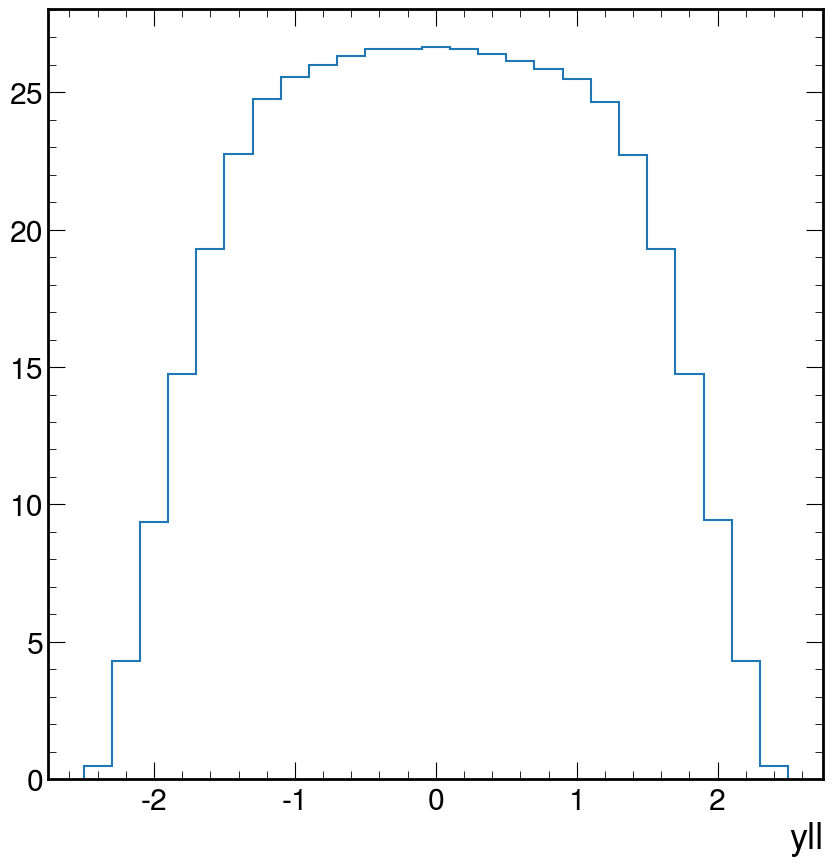

In [30]:
has[{"tensor_axis_0" : 0}].project("yll").plot()

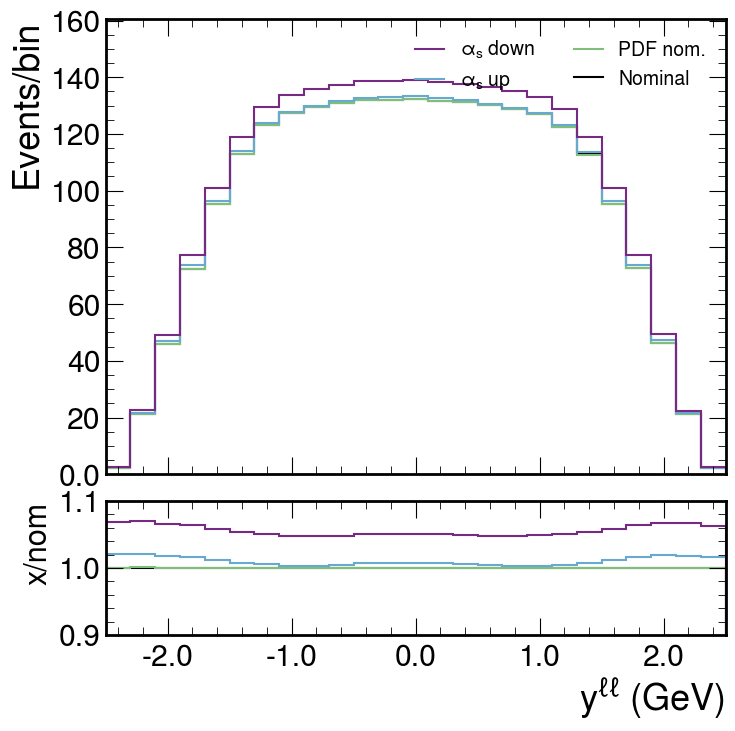

In [56]:
fig = plot_tools.makePlotWithRatioToRef(
            [x.project("yll") for x in [hnom,
                h[{"tensor_axis_0" : 0}],
                 has[{"tensor_axis_0" : 0}],
                 has[{"tensor_axis_0" : 1}],
            ]],
            ["Nominal", "PDF nom.", r"$\alpha_s$ up", r"$\alpha_s$ down"], 
            colors=["black", "#7fbf7b", "#67a9cf", "#762a83",], 
            xlabel=r"y$^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/nom",
            rrange=[0.9, 1.1],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True)

In [54]:
hup, hdown = theory_tools.hessianPdfUnc(h, uncType="asymHessian")

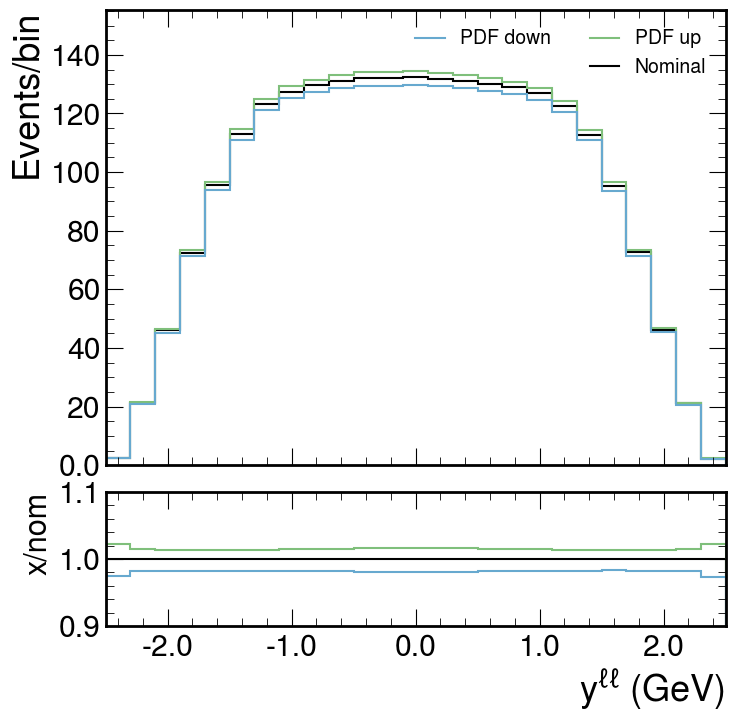

In [57]:
fig = plot_tools.makePlotWithRatioToRef(
            [x.project("yll") for x in [hnom,
                hup,
                 hdown,
            ]],
            ["Nominal", "PDF up", r"PDF down"], 
            colors=["black", "#7fbf7b", "#67a9cf", ], 
            xlabel=r"y$^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/nom",
            rrange=[0.9, 1.1],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True)

In [115]:
h = input_tools.read_and_scale("/scratch/kelong/Analysis/PdfStudy/mw_with_mu_eta_pt_dyturboCorr.hdf5", "ZmumuPostVFP", "nominal_pdfMSHT20")

In [94]:
s = hist.tag.Slicer()

In [116]:
h

Hist(
  Regular(48, -2.4, 2.4, name='eta'),
  Regular(29, 26, 55, name='pt'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='charge'),
  Boolean(name='passIso'),
  Boolean(name='passMT'),
  StrCategory(['pdf0MSHT20', 'pdf0MSHT20Down', 'pdf0MSHT20Up', 'pdf1MSHT20Down', 'pdf1MSHT20Up', 'pdf2MSHT20Down', 'pdf2MSHT20Up', 'pdf3MSHT20Down', 'pdf3MSHT20Up', 'pdf4MSHT20Down', 'pdf4MSHT20Up', 'pdf5MSHT20Down', 'pdf5MSHT20Up', 'pdf6MSHT20Down', 'pdf6MSHT20Up', 'pdf7MSHT20Down', 'pdf7MSHT20Up', 'pdf8MSHT20Down', 'pdf8MSHT20Up', 'pdf9MSHT20Down', 'pdf9MSHT20Up', 'pdf10MSHT20Down', 'pdf10MSHT20Up', 'pdf11MSHT20Down', 'pdf11MSHT20Up', 'pdf12MSHT20Down', 'pdf12MSHT20Up', 'pdf13MSHT20Down', 'pdf13MSHT20Up', 'pdf14MSHT20Down', 'pdf14MSHT20Up', 'pdf15MSHT20Down', 'pdf15MSHT20Up', 'pdf16MSHT20Down', 'pdf16MSHT20Up', 'pdf17MSHT20Down', 'pdf17MSHT20Up', 'pdf18MSHT20Down', 'pdf18MSHT20Up', 'pdf19MSHT20Down', 'pdf19MSHT20Up', 'pdf20MSHT20Down', 'pdf20MSHT20Up', 'pdf21MSHT20Down', 'pdf21MSHT20Up',

In [91]:
a[1:-1:2].shape

(32,)

In [86]:
h.project("ptll", "pdfVar").values(flow=True)[...,1:-1:2].shape

(21, 32)

In [87]:
h.project("ptll", "pdfVar").values(flow=True)[...,2::2].shape

(21, 32)

In [108]:
theory_tools.hessianPdfUnc(h.project("ptll", "pdfVar"), uncType="asymHessian")

(Hist(Variable([0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 23, 27, 32, 40, 55, 100], underflow=False, name='ptll'), storage=Weight()) # Sum: WeightedSum(value=472.32, variance=0.0395925) (WeightedSum(value=472.985, variance=0.0396094) with flow),
 Hist(Variable([0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 23, 27, 32, 40, 55, 100], underflow=False, name='ptll'), storage=Weight()) # Sum: WeightedSum(value=457.847, variance=0.0396016) (WeightedSum(value=458.504, variance=0.0396185) with flow))

In [74]:
for i in h.axes["pdfVar"]:
    print(h[{"pdfVar" : i}].sum())

WeightedSum(value=464.247, variance=0.0132241)
WeightedSum(value=464.397, variance=0.0132287)
WeightedSum(value=464.045, variance=0.0132185)
WeightedSum(value=463.784, variance=0.0132305)
WeightedSum(value=464.687, variance=0.0132223)
WeightedSum(value=464.619, variance=0.0132729)
WeightedSum(value=463.666, variance=0.0131543)
WeightedSum(value=464.259, variance=0.0131994)
WeightedSum(value=464.23, variance=0.0132467)
WeightedSum(value=462.393, variance=0.0131054)
WeightedSum(value=466.158, variance=0.0133494)
WeightedSum(value=462.15, variance=0.0131411)
WeightedSum(value=466.297, variance=0.0133116)
WeightedSum(value=464.007, variance=0.0131949)
WeightedSum(value=464.422, variance=0.0132472)
WeightedSum(value=465.305, variance=0.0132618)
WeightedSum(value=465.305, variance=0.0132618)
WeightedSum(value=464.503, variance=0.0132487)
WeightedSum(value=464.057, variance=0.0132073)
WeightedSum(value=464.123, variance=0.0132341)
WeightedSum(value=464.45, variance=0.013214)
WeightedSum(value